In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
# Read in the data

url = 'standard_atmosphere.txt'
df = pd.read_csv(url)
df.head(100)

,Altitude,Temperature,Gravity,Pressure,Density,Viscosity
0,-1000,21.50,9.810,11.390000,1.347000,1.821
1,0,15.00,9.807,10.130000,1.225000,1.789
2,1000,8.50,9.804,8.988000,1.112000,1.758
3,2000,2.00,9.801,7.950000,1.007000,1.726
4,3000,-4.49,9.797,7.012000,0.909300,1.694
5,4000,-10.98,9.794,6.166000,0.819400,1.661
6,5000,-17.47,9.791,5.405000,0.736400,1.628
7,6000,-23.96,9.788,4.722000,0.660100,1.595
8,7000,-30.45,9.785,4.111000,0.590000,1.561
9,8000,-36.94,9.782,3.565000,0.525800,1.527


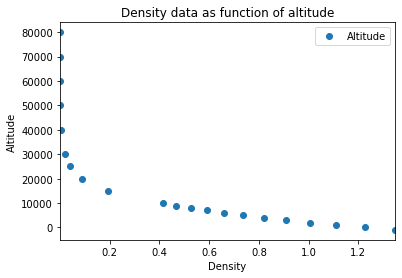

In [3]:
# plot the data

df.plot('Density','Altitude',style='o')
plt.ylabel('Altitude')
plt.title('Density data as function of altitude')
plt.show()

In [4]:

result = sm.ols('Density ~ Altitude',df,).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     29.77
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           2.90e-05
Time:                        19:54:03   Log-Likelihood:                -2.9699
No. Observations:                  21   AIC:                             9.940
Df Residuals:                      19   BIC:                             12.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7905      0.085      9.285      0.0

In [5]:

# Extract information from the result object and plot along with the data.
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

0.7905106882449039 -1.4505609151222945e-05 0.6104098703803786


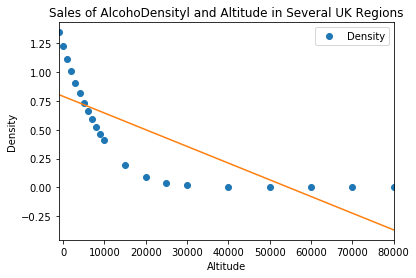

In [6]:
yfit = yint + slope*df['Altitude']
x = df['Altitude']

df.plot('Altitude','Density',style='o')
plt.ylabel('Density')
plt.title('Density data as function of altitude')
plt.plot(x,yfit)
plt.show()

In [7]:
result = sm.ols('Density ~ Altitude',df[:-1],).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     31.75
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           2.40e-05
Time:                        19:54:06   Log-Likelihood:                -1.9727
No. Observations:                  20   AIC:                             7.945
Df Residuals:                      18   BIC:                             9.937
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8209      0.084      9.780      0.0

In [14]:
logrow = np.log(df['Density'])
df['LogDensity'] = logrow

df.head(100)

,Altitude,Temperature,Gravity,Pressure,Density,Viscosity,LogDensity
0,-1000,21.50,9.810,11.390000,1.347000,1.821,0.297880
1,0,15.00,9.807,10.130000,1.225000,1.789,0.202941
2,1000,8.50,9.804,8.988000,1.112000,1.758,0.106160
3,2000,2.00,9.801,7.950000,1.007000,1.726,0.006976
4,3000,-4.49,9.797,7.012000,0.909300,1.694,-0.095080
5,4000,-10.98,9.794,6.166000,0.819400,1.661,-0.199183
6,5000,-17.47,9.791,5.405000,0.736400,1.628,-0.305982
7,6000,-23.96,9.788,4.722000,0.660100,1.595,-0.415364
8,7000,-30.45,9.785,4.111000,0.590000,1.561,-0.527633
9,8000,-36.94,9.782,3.565000,0.525800,1.527,-0.642834


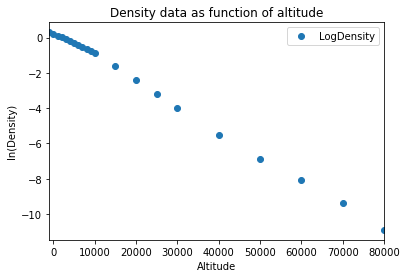

In [15]:
df.plot('Altitude', 'LogDensity' , style='o')
plt.ylabel('ln(Density)')
plt.title('Density data as function of altitude')
plt.show()

In [16]:
def fitfunction(x, *paramlist):
    return paramlist[1]*x+paramlist[2]*np.sqrt(x)+np.log(paramlist[0])

In [19]:
init_vals = [1.0, -0.001, -0.00001]

x = np.array(df['Altitude'][1:])
y = np.array(df['LogDensity'][1:])

popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

Coefficients from curve fit
[ 1.34831889e+00 -1.45638916e-04  1.29598412e-03]
Covarience Matrix from curve fit
[[ 1.28529679e-02  4.10202204e-07 -1.40070064e-04]
 [ 4.10202204e-07  2.06821276e-11 -6.06265972e-09]
 [-1.40070064e-04 -6.06265972e-09  1.89379697e-06]]


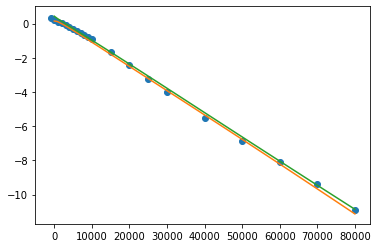

In [22]:
xi = np.linspace(0,80000,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample = np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample, 5, axis=0)
upper = np.percentile(ysample, 95, axis=0)

print("Coefficients from curve fit")
print(popt)
print("Covarience Matrix from curve fit")
print(pcov)

plt.plot(df.Altitude,df.LogDensity,'o')
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

In [23]:
print ("A = %0.2f +/- %0.2f" % (popt[0],np.sqrt(pcov[0][0])))
print ("B = %0.7f +/- %0.7f" % (popt[1],np.sqrt(pcov[1][1])))
print ("C = %0.4f +/- %0.4f" % (popt[2],np.sqrt(pcov[2][2])))

A = 1.35 +/- 0.11
B = -0.0001456 +/- 0.0000045
C = 0.0013 +/- 0.0014


Coefficients (from curve_fit)
[ 7.90510688e-01 -1.45056092e-05]
Covariance Matrix (from curve_fit)
[[ 7.24853907e-03 -1.49440536e-07]
 [-1.49440536e-07  7.06813349e-12]]


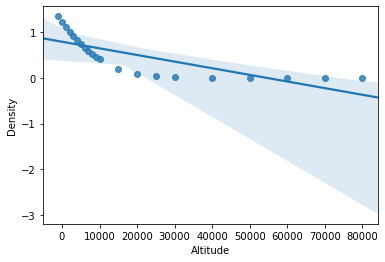

In [24]:
import seaborn as sns
sns.regplot('Altitude', 'Density', df, ci=99.99)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(df['Altitude'])
y = np.array(df['Density'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

#plt.plot(xi,lower)
#plt.plot(xi,upper)
plt.show()